To generate your own small corpus instead of using the text8 dataset from Gensim, you can simply use a list of sample text documents and process them in the same way. Here's a modified version of your code that uses a custom list of documents:

Replace text8 with a sample corpus

In [1]:
!pip install spacy

In [2]:
pip list


Package                   Version
------------------------- -----------
annotated-types           0.7.0
anyio                     4.7.0
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
asttokens                 3.0.0
async-lru                 2.0.4
attrs                     24.3.0
babel                     2.16.0
beautifulsoup4            4.13.4
bleach                    6.2.0
blis                      1.3.0
brotlicffi                1.0.9.2
catalogue                 2.0.10
certifi                   2025.7.14
cffi                      1.17.1
charset-normalizer        3.3.2
click                     8.2.1
cloudpathlib              0.21.1
colorama                  0.4.6
comm                      0.2.1
confection                0.1.5
cymem                     2.0.11
debugpy                   1.8.11
decorator                 5.1.1
defusedxml                0.7.1
executing                 0.8.3
fastjsonschema            2.20.0
gensim                    4.3.3
h11            

In [4]:
!pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached regex-2024.11.6-cp310-cp310-win_amd64.whl.metadata (41 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.11.6-cp310-cp310-win_amd64.whl (274 kB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   ---------------------

In [1]:
import gensim
from gensim import corpora
from gensim.models import LdaModel, LdaMulticore
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
import re
import logging
import spacy

# Load spaCy English model for lemmatization
nlp = spacy.load("en_core_web_sm")

# Set up logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
logging.root.setLevel(level=logging.INFO)

# Sample custom corpus
documents = [
    "Artificial intelligence is transforming the world.",
    "Deep learning models are used in natural language processing.",
    "Computer vision is a branch of AI that deals with images.",
    "Neural networks mimic the human brain to learn patterns.",
    "Data preprocessing is essential for machine learning tasks."
]

# Download stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words += ['subject', 'com', 'are', 'edu', 'would', 'could']

# Define lemmatization function using spaCy
def lemmatize_spacy(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if token.pos_ in ['NOUN', 'ADJ', 'ADV'] and token.text.lower() not in stop_words]

# Preprocess the documents
processed_data = []
for doc in documents:
    lemmatized = lemmatize_spacy(doc.lower())
    processed_data.append(lemmatized)

print("Sample processed data:", processed_data[0][:10])


Sample processed data: ['artificial', 'intelligence', 'world']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Uses a custom list (documents) as your corpus.

Applies tokenization + lemmatization using spaCy instead of Gensim’s outdated lemmatize.

Filters nouns, adjectives, adverbs.

Removes stop words.



In [2]:
# Create a dictionary and corpus
dictionary = corpora.Dictionary(processed_data)
corpus = [dictionary.doc2bow(text) for text in processed_data]

# Train LDA model
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=2, passes=10, workers=2)

# Print topics
print("\nTopics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic}")


2025-07-25 17:47:26,415 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2025-07-25 17:47:26,418 : INFO : built Dictionary<25 unique tokens: ['artificial', 'intelligence', 'world', 'deep', 'language']...> from 5 documents (total 26 corpus positions)
2025-07-25 17:47:26,420 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<25 unique tokens: ['artificial', 'intelligence', 'world', 'deep', 'language']...> from 5 documents (total 26 corpus positions)", 'datetime': '2025-07-25T17:47:26.420161', 'gensim': '4.3.3', 'python': '3.10.18 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:08:55) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.26100-SP0', 'event': 'created'}
2025-07-25 17:47:26,422 : INFO : using symmetric alpha at 0.5
2025-07-25 17:47:26,424 : INFO : using symmetric eta at 0.5
2025-07-25 17:47:26,425 : INFO : using serial LDA version on this node
2025-07-25 17:47:26,429 : INFO : running online LDA training, 2 topics, 10 passes over the suppl


Topics:
Topic 0: 0.102*"learning" + 0.061*"model" + 0.061*"deep" + 0.061*"language" + 0.061*"natural" + 0.061*"processing" + 0.061*"task" + 0.061*"preprocessing" + 0.061*"essential" + 0.061*"datum"
Topic 1: 0.056*"branch" + 0.056*"ai" + 0.056*"image" + 0.056*"deal" + 0.056*"computer" + 0.056*"vision" + 0.056*"neural" + 0.056*"human" + 0.056*"brain" + 0.056*"network"


In [7]:
pip list

Package            Version
------------------ -----------
asttokens          3.0.0
blis               0.7.10
Brotli             1.1.0
catalogue          2.0.10
certifi            2025.7.14
cffi               1.17.1
charset-normalizer 3.4.2
click              8.2.1
cloudpickle        3.1.1
colorama           0.4.6
comm               0.2.1
confection         0.1.5
cymem              2.0.11
debugpy            1.8.11
decorator          5.1.1
en-core-web-sm     3.5.0
exceptiongroup     1.2.0
executing          0.8.3
gensim             4.3.3
h2                 4.2.0
hpack              4.1.0
hyperframe         6.1.0
idna               3.10
ipykernel          6.29.5
ipython            8.30.0
jedi               0.19.2
Jinja2             3.1.6
joblib             1.5.1
jupyter_client     8.6.3
jupyter_core       5.8.1
langcodes          3.4.1
language_data      1.3.0
marisa-trie        1.2.1
markdown-it-py     3.0.0
MarkupSafe         3.0.2
matplotlib-inline  0.1.6
mdurl              0.1.2
murmur

In [8]:
!jupyter kernelspec list


Available kernels:
  python3    C:\Users\Welcome\anaconda3\envs\mycorrectenv\share\jupyter\kernels\python3


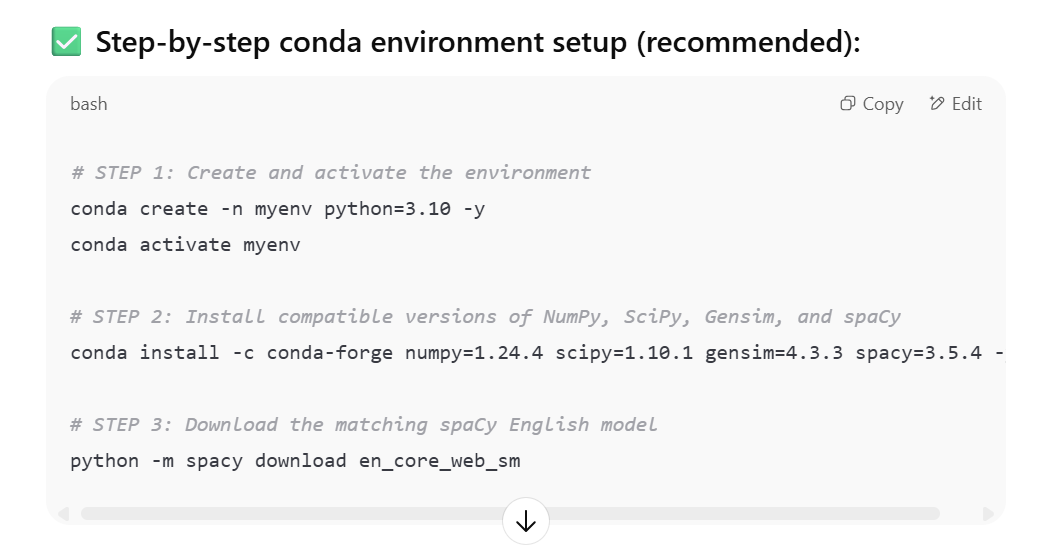

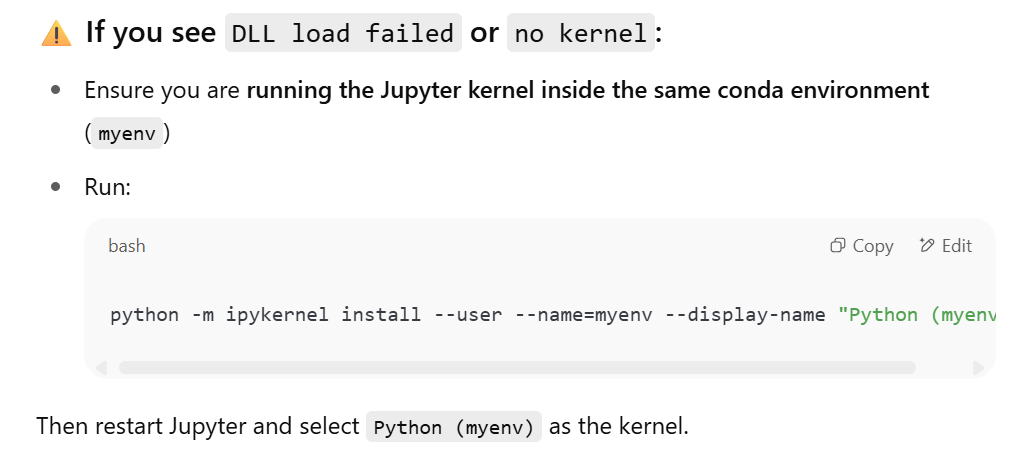

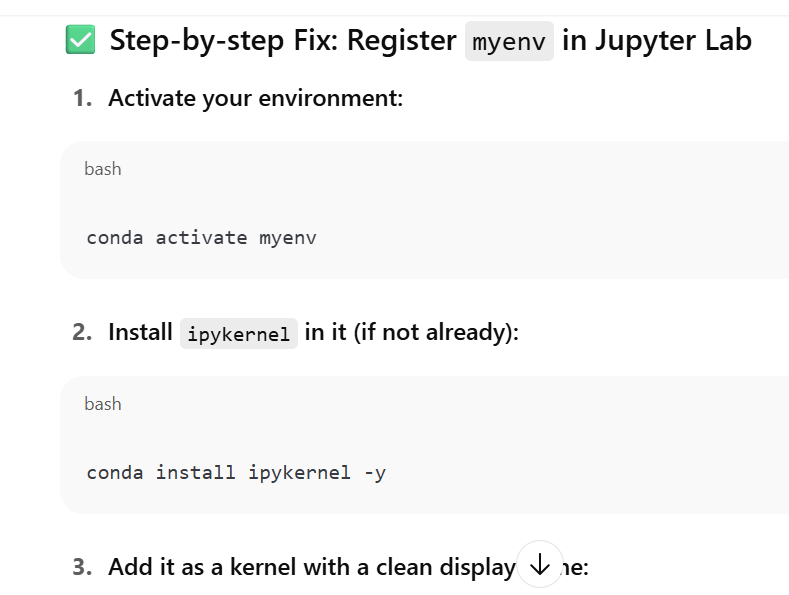

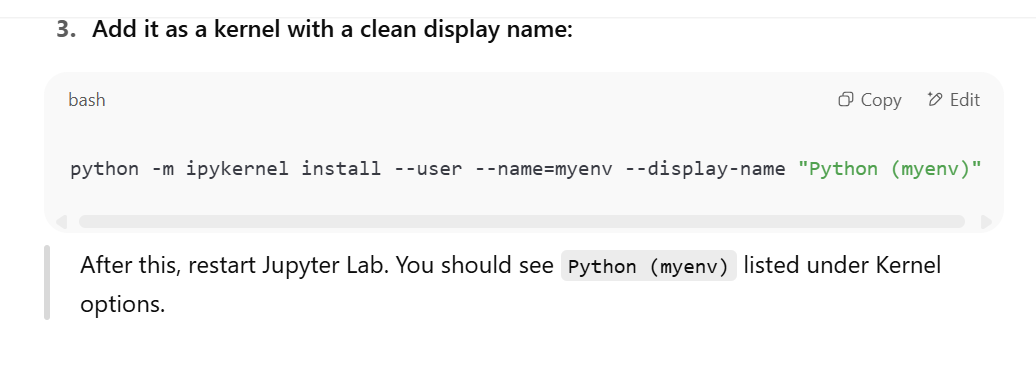

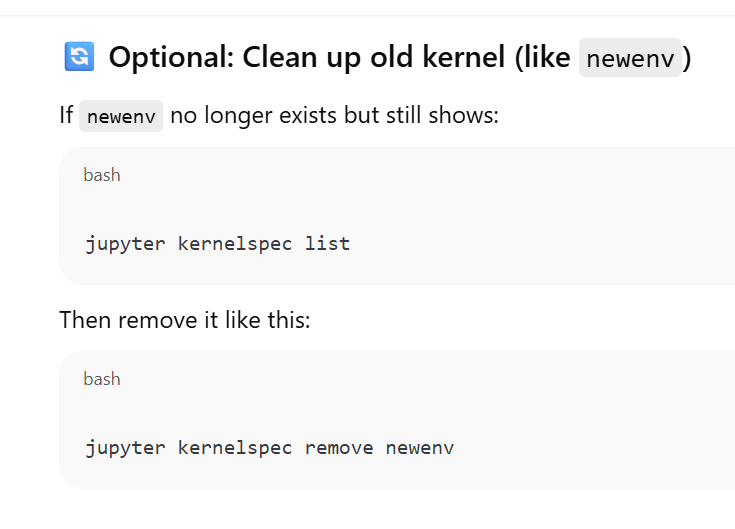

Train LDA model 
We will be training the LDA model with 5 topics using the dictionary and corpus created previously. Here the LdaModel( ) function is used but you can also use the LdaMulticore( ) function as it allows parallel processing. 






In [4]:
# Training and Saving model
LDA_model = LdaModel(corpus = corpus, num_topics = 5)
LDA_model.save('LDA_model.model')
print(LDA_model.print_topics(-1))

2025-07-25 17:49:05,280 : WARNING : no word id mapping provided; initializing from corpus, assuming identity
2025-07-25 17:49:05,282 : INFO : using symmetric alpha at 0.2
2025-07-25 17:49:05,283 : INFO : using symmetric eta at 0.2
2025-07-25 17:49:05,284 : INFO : using serial LDA version on this node
2025-07-25 17:49:05,286 : INFO : running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 5 documents, updating model once every 5 documents, evaluating perplexity every 5 documents, iterating 50x with a convergence threshold of 0.001000
2025-07-25 17:49:05,287 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2025-07-25 17:49:05,298 : INFO : -7.334 per-word bound, 161.3 perplexity estimate based on a held-out corpus of 5 documents with 26 words
2025-07-25 17:49:05,299 : INFO : PROGRESS: pass 0, at document #5/5
2025-07-25 17:49:05,306 : INFO : topic #0 (0.200): 0.149*"1" + 0

[(0, '0.149*"1" + 0.149*"0" + 0.149*"2" + 0.025*"5" + 0.025*"17" + 0.025*"16" + 0.025*"6" + 0.025*"8" + 0.025*"4" + 0.025*"9"'), (1, '0.109*"14" + 0.109*"11" + 0.109*"13" + 0.109*"10" + 0.109*"12" + 0.109*"9" + 0.018*"2" + 0.018*"0" + 0.018*"5" + 0.018*"1"'), (2, '0.109*"5" + 0.109*"7" + 0.109*"8" + 0.109*"3" + 0.109*"4" + 0.109*"6" + 0.018*"2" + 0.018*"17" + 0.018*"0" + 0.018*"1"'), (3, '0.075*"21" + 0.075*"22" + 0.075*"5" + 0.075*"24" + 0.075*"20" + 0.075*"19" + 0.075*"23" + 0.075*"15" + 0.075*"18" + 0.075*"16"'), (4, '0.040*"0" + 0.040*"2" + 0.040*"1" + 0.040*"5" + 0.040*"17" + 0.040*"10" + 0.040*"9" + 0.040*"18" + 0.040*"3" + 0.040*"12"')]


The words which can be seen in more than one topic and are of less relevance can be added to the stopwords list.

The LDA model majorly gives us information regarding 3 things: 

Topics in the document
What topic each word belongs to
Phi value: Probability of a word to lie in a particular topic. For a given word, sum of the phi values give the number of times that word occurred in the document.

AttributeError: 'FakeDict' object has no attribute 'doc2bow'
happens because you're passing a plain dictionary or string-to-index mapping (FakeDict) to the LdaModel instead of a proper Gensim Dictionary object (gensim.corpora.Dictionary) which has the .doc2bow() method.



In [6]:
from gensim import corpora
from gensim.models import LdaModel

# Example documents
documents = [['fire', 'burn', 'flame'], ['water', 'flow', 'stream'], ['car', 'drive', 'road']]

# Create Dictionary
dictionary = corpora.Dictionary(documents)

# Create corpus
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Train LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes=15)

# Now use get_term_topics properly
print(lda_model.get_term_topics('fire'))  # 🔥 Now this works!


2025-07-25 17:59:20,829 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2025-07-25 17:59:20,832 : INFO : built Dictionary<9 unique tokens: ['burn', 'fire', 'flame', 'flow', 'stream']...> from 3 documents (total 9 corpus positions)
2025-07-25 17:59:20,834 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<9 unique tokens: ['burn', 'fire', 'flame', 'flow', 'stream']...> from 3 documents (total 9 corpus positions)", 'datetime': '2025-07-25T17:59:20.834762', 'gensim': '4.3.3', 'python': '3.10.18 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:08:55) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.26100-SP0', 'event': 'created'}
2025-07-25 17:59:20,836 : INFO : using symmetric alpha at 0.3333333333333333
2025-07-25 17:59:20,838 : INFO : using symmetric eta at 0.3333333333333333
2025-07-25 17:59:20,840 : INFO : using serial LDA version on this node
2025-07-25 17:59:20,841 : INFO : running online (multi-pass) LDA training, 3 topics, 15 passes over th

[(1, 0.15881939)]


In [10]:
from gensim import corpora
from gensim.models import LdaModel

# Sample documents
documents = [['time', 'space', 'car'], ['fire', 'burn', 'hot'], ['water', 'cold', 'ice']]

# Step 1: Create Dictionary
dictionary = corpora.Dictionary(documents)

# Step 2: Create Corpus
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Step 3: Train the LDA Model
LDA_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes=10)

# Step 4: Get term topics
print(LDA_model.get_term_topics('fire'))

# Step 5: Get document topics with per-word topics
bow_list = ['time', 'space', 'car']
bow = dictionary.doc2bow(bow_list)  # ✅ use dictionary here, not LDA_model.id2word
doc_topics, word_topics, phi_values = LDA_model.get_document_topics(bow, per_word_topics=True)

print("Doc topics:", doc_topics)
print("Word topics:", word_topics)


2025-07-25 18:06:04,566 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2025-07-25 18:06:04,570 : INFO : built Dictionary<9 unique tokens: ['car', 'space', 'time', 'burn', 'fire']...> from 3 documents (total 9 corpus positions)
2025-07-25 18:06:04,572 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<9 unique tokens: ['car', 'space', 'time', 'burn', 'fire']...> from 3 documents (total 9 corpus positions)", 'datetime': '2025-07-25T18:06:04.572917', 'gensim': '4.3.3', 'python': '3.10.18 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:08:55) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.26100-SP0', 'event': 'created'}
2025-07-25 18:06:04,575 : INFO : using symmetric alpha at 0.3333333333333333
2025-07-25 18:06:04,577 : INFO : using symmetric eta at 0.3333333333333333
2025-07-25 18:06:04,579 : INFO : using serial LDA version on this node
2025-07-25 18:06:04,581 : INFO : running online (multi-pass) LDA training, 3 topics, 10 passes over the supp

[(0, 0.15873162)]
Doc topics: [(0, 0.08392764), (1, 0.08392779), (2, 0.83214456)]
Word topics: [(0, [2]), (1, [2]), (2, [2])]


Topic Modelling using LSI 
To create the model with LSI just follow the steps same as with LDA. The only difference will be while training the model. Use the LsiModel( ) function instead of the LdaMulticore( ) or LdaModel( ). We trained the model using LSI and then printed the topics.

In [13]:
from gensim import corpora
from gensim.models import LsiModel

# Example documents
documents = [['human', 'interface', 'computer'],
             ['survey', 'user', 'computer', 'system'],
             ['eps', 'user', 'interface', 'system'],
             ['system', 'human', 'system', 'eps'],
             ['user', 'response', 'time'],
             ['trees'],
             ['graph', 'trees'],
             ['graph', 'minors', 'trees'],
             ['graph', 'minors', 'survey']]

# Create dictionary and corpus
dct = corpora.Dictionary(documents)
corpus = [dct.doc2bow(doc) for doc in documents]

# Train LSI model
LSI_model = LsiModel(corpus=corpus, id2word=dct, num_topics=7)

# Show topics
print(LSI_model.print_topics(-1))


2025-07-25 18:18:00,180 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2025-07-25 18:18:00,182 : INFO : built Dictionary<12 unique tokens: ['computer', 'human', 'interface', 'survey', 'system']...> from 9 documents (total 27 corpus positions)
2025-07-25 18:18:00,184 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<12 unique tokens: ['computer', 'human', 'interface', 'survey', 'system']...> from 9 documents (total 27 corpus positions)", 'datetime': '2025-07-25T18:18:00.184751', 'gensim': '4.3.3', 'python': '3.10.18 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:08:55) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.26100-SP0', 'event': 'created'}
2025-07-25 18:18:00,186 : INFO : using serial LSI version on this node
2025-07-25 18:18:00,189 : INFO : updating model with new documents
2025-07-25 18:18:00,191 : INFO : preparing a new chunk of documents
2025-07-25 18:18:00,195 : INFO : using 100 extra samples and 2 power iterations
2025-07-25 18

[(0, '0.722*"system" + 0.372*"eps" + 0.353*"user" + 0.279*"human" + 0.238*"interface" + 0.216*"computer" + 0.167*"survey" + 0.043*"time" + 0.043*"response" + 0.036*"graph"'), (1, '0.656*"graph" + 0.523*"trees" + 0.472*"minors" + 0.248*"survey" + -0.070*"system" + -0.064*"eps" + -0.049*"human" + -0.034*"interface" + 0.024*"computer" + 0.011*"user"'), (2, '-0.623*"user" + -0.347*"time" + -0.347*"response" + -0.289*"survey" + 0.271*"system" + 0.270*"human" + -0.234*"computer" + 0.228*"eps" + 0.166*"trees" + 0.064*"graph"'), (3, '-0.613*"computer" + -0.310*"human" + -0.305*"interface" + -0.305*"survey" + 0.260*"response" + 0.260*"time" + 0.256*"eps" + 0.220*"trees" + 0.213*"user" + 0.204*"system"'), (4, '0.513*"survey" + -0.512*"interface" + -0.450*"trees" + 0.281*"system" + -0.269*"human" + 0.189*"minors" + -0.167*"time" + -0.167*"response" + -0.142*"computer" + -0.085*"user"'), (5, '0.558*"trees" + -0.444*"minors" + -0.409*"interface" + 0.339*"computer" + -0.273*"eps" + -0.203*"graph" + 

Topic Modeling Using Latent Dirichlet Allocation (LDA)
Last Updated : 23 Jul, 2025
In the era of information explosion, extracting meaningful insights from large collections of text data has become increasingly important. Topic modeling is a powerful technique for uncovering hidden themes or topics within a corpus of documents. Among the various methods available, Latent Dirichlet Allocation (LDA) stands out as one of the most popular and effective algorithms for topic modeling.

Importance of Topic Modeling
Topic modeling is crucial for several reasons:

Dimensionality Reduction: It reduces the complexity of text data by representing documents in terms of a limited number of topics.
Information Retrieval: It enhances the retrieval of relevant information by identifying underlying themes.
Data Exploration: It provides a way to explore and understand large collections of text data by summarizing them into interpretable topics.

What is Latent Dirichlet Allocation (LDA)?
Latent Dirichlet Allocation (LDA) is a generative probabilistic model designed to discover latent topics in large collections of text documents. LDA assumes that each document is a mixture of topics and that each topic is a mixture of words. The goal of LDA is to identify these topics and determine the distribution of topics within each document and the distribution of words within each topic.

How LDA Works
LDA operates on the following principles:

Document-Topic Distribution: Each document is represented as a distribution over topics. This means that a document can belong to multiple topics, each with a certain probability.
Topic-Word Distribution: Each topic is represented as a distribution over words. This implies that a topic is defined by a set of words, each associated with a probability of appearing in that topic.
Generative Process: LDA uses a generative process to create documents. This involves:
Choosing a distribution of topics for each document.
For each word in the document, selecting a topic based on the topic distribution.
Generating the word from the selected topic's word distribution.

In [15]:
!pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.3 MB 8.4 MB/s eta 0:00:02
   ------------ --------------------------- 3.7/11.3 MB 10.4 MB/s eta 0:00:01
   -------------------- ------------------- 5.8/11.3 MB 10.1 MB/s eta 0:00:01
   ---------------------------- ----------- 8.1/11.3 MB 10.3 MB/s eta 0:00:01
   ------------------------------------ --- 10.2/11.3 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 11.3/11.3 MB 9.8 MB/s eta 0:00:00
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [tz

In [18]:
!pip install matplotlib

  Using cached matplotlib-3.10.3-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp310-cp310-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp310-cp310-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.3 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 7.5 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl (71 kB)
Using cached pillow-11.3.0-cp310-cp310-win_amd64.whl (7.0 MB)
Using cached pyparsing-3.2.3-py3-none-an

In [19]:
import pandas as pd

# Create a sample dataset
data = {
    'text_column': [
        'The cat sat on the mat.',
        'Dogs are great pets.',
        'I love to play football.',
        'Data science is an interdisciplinary field.',
        'Python is a great programming language.',
        'Machine learning is a subset of artificial intelligence.',
        'Artificial intelligence and machine learning are popular topics.',
        'Deep learning is a type of machine learning.',
        'Natural language processing involves analyzing text data.',
        'I enjoy hiking and outdoor activities.'
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv('sample_dataset.csv', index=False)

import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import spacy
import nltk
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Load data
data = pd.read_csv('sample_dataset.csv')  # Load the sample dataset

# Preprocess the text data
def preprocess_text(text):
    text = re.sub('\s+', ' ', text)  # Remove extra spaces
    text = re.sub('\S*@\S*\s?', '', text)  # Remove emails
    text = re.sub('\'', '', text)  # Remove apostrophes
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabet characters
    text = text.lower()  # Convert to lowercase
    return text

data['cleaned_text'] = data['text_column'].apply(preprocess_text)  # Replace 'text_column' with your column name

# Tokenize and remove stopwords
def tokenize(text):
    tokens = gensim.utils.simple_preprocess(text, deacc=True)
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

data['tokens'] = data['cleaned_text'].apply(tokenize)

# Lemmatization using spaCy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def lemmatize(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

data['lemmas'] = data['tokens'].apply(lemmatize)

# Create dictionary and corpus
id2word = corpora.Dictionary(data['lemmas'])
texts = data['lemmas']
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=3, 
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

# Print the topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

# Compute coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data['lemmas'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-07-25 23:35:31,684 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2025-07-25 23:35:31,685 : INFO : built Dictionary<34 unique tokens: ['cat', 'mat', 'sit', 'dog', 'great']...> from 10 documents (total 43 corpus positions)
2025-07-25 23:35:31,685 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<34 unique tokens: ['cat', 'mat', 'sit', 'dog', 'great']...> from 10 documents (total 43 corpus positions)", 'datetime': '2025-07-25T23:35:31.685474', 'gensim': '4.3.3', 'python': '3.10.18 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:08:55) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.26100-SP0', 'event': 'created'}
2025-07-25 23:35:31,685 : INFO : using autotuned alpha, starting with [0.33333334, 0.33333334, 0.33333334]
2025-07-25 23:35:31,685 : INFO : using symmetric eta at 0.3333

(0, '0.115*"learning" + 0.066*"type" + 0.066*"programming" + 0.066*"python" + 0.066*"deep" + 0.066*"great" + 0.065*"language" + 0.065*"machine" + 0.016*"datum" + 0.016*"love"')
(1, '0.062*"outdoor" + 0.062*"activity" + 0.062*"football" + 0.062*"enjoy" + 0.062*"cat" + 0.062*"play" + 0.062*"hike" + 0.062*"mat" + 0.062*"sit" + 0.062*"love"')
(2, '0.066*"machine" + 0.066*"datum" + 0.066*"artificial" + 0.066*"intelligence" + 0.038*"language" + 0.038*"great" + 0.038*"learning" + 0.038*"popular" + 0.038*"learn" + 0.038*"processing"')


2025-07-25 23:35:37,008 : INFO : 7 accumulators retrieved from output queue
2025-07-25 23:35:37,044 : INFO : accumulated word occurrence stats for 10 virtual documents



Coherence Score:  0.5839748062472863


Step 1: Install Necessary Libraries
This step involves installing the required libraries for text processing and topic modeling, including pandas, gensim, spacy, nltk, and matplotlib.

!pip install pandas gensim spacy nltk matplotlib
Step 2: Create and Save Sample Dataset
In this step, we create a sample dataset containing a text column and save it to a CSV file. The sample dataset consists of a list of 10 text entries, each containing a short sentence.

Compute the coherence score to evaluate the quality of the topics.

The output shows three topics, each represented by a list of words with associated weights, indicating the importance of each word in that topic. The coherence score, which is 0.5839748062472863, measures the interpretability of the topics. Higher scores generally indicate more coherent and interpretable topics.

The coherence score of 0.5839748062472863 suggests that the topics are reasonably coherent and interpretable, although there might still be room for improvement. Coherence scores range from 0 to 1, with higher scores indicating better topic quality.

Applications of LDA and Topic Modeling
LDA and topic modeling have a wide range of applications across various domains. Here are some notable examples:

Document Classification: Topic modeling can be used to classify documents into categories based on their dominant topics. For instance, in news aggregation, articles can be categorized into topics such as politics, sports, technology, and entertainment.
Recommendation Systems: By understanding the topics of documents or products, recommendation systems can suggest relevant items to users. For example, an online bookstore can recommend books based on the topics a user has shown interest in.
Content Summarization: Topic modeling helps in summarizing large collections of documents by extracting the main themes. This is particularly useful in literature reviews and survey papers where summarizing vast amounts of research is necessary.
Trend Analysis: LDA can be employed to analyze trends over time by examining the distribution of topics in documents from different time periods. This is valuable for market research and understanding evolving interests.
Sentiment Analysis: Combining topic modeling with sentiment analysis can provide insights into the sentiment associated with specific topics. This is useful in opinion mining and social media analysis.
Conclusion
Latent Dirichlet Allocation (LDA) is a powerful tool for topic modeling, enabling the discovery of hidden themes within large collections of text documents. By representing documents as mixtures of topics and topics as mixtures of words, LDA provides a probabilistic framework for understanding and exploring text data. Its applications span numerous fields, from document classification and recommendation systems to trend analysis and sentiment analysis. Despite some limitations, such as the need for large datasets and computational resources, LDA remains a foundational technique in the realm of natural language processing and text mining.

